<div class='heading'>
    <div style='float:left;'><h1>CPSC 4300/6300: Applied Data Science</h1></div>
    <img style="float: right; padding-right: 10px; width: 65px" src="https://raw.githubusercontent.com/bsethwalker/clemson-cs4300/main/images/clemson_paw.png"> </div>


## Homework 2: k-NN Regression

**Clemson University**<br>
**Fall 2021**<br>
**Instructor(s):** Nina Hubig <br>


---



In [1]:
""" RUN THIS CELL TO GET THE RIGHT FORMATTING """
import requests
from IPython.core.display import HTML
css_file = 'https://raw.githubusercontent.com/bsethwalker/clemson-cs4300/main/css/cpsc6300.css'
styles = requests.get(css_file).text
HTML(styles)

### INSTRUCTIONS

- To submit your assignment follow the instructions given in Canvas.
- Restart the kernel and run the whole notebook again before you submit. 
- If you submit individually and you have worked with someone, please include the name of your [one] partner below. 
- As much as possible, try and stick to the hints and functions we import at the top of the homework, as those are the ideas and tools the class supports and is aiming to teach. And if a problem specifies a particular library you're required to use that library, and possibly others from the import list.
- Please use .head() when viewing data. Do not submit a notebook that is excessively long because output was not suppressed or otherwise limited. 

---

In this homework, we will explore regression methods for predicting a quantitative variable. Specifically, we will build regression models that can predict the number of taxi pickups in New York City at any given time of the day. These prediction models will be useful, for example, in monitoring traffic in the city.

The data set for this problem is given in the file `nyc_taxi.csv`.  You will need to separate it into training and test sets. The first column contains the time of a day in minutes, and the second column contains the number of pickups observed at that time. The data set covers taxi pickups recorded in NYC during Jan 2015.

We will fit models that use the time of the day (in minutes) as a predictor and predict the average number of taxi pickups at that time. The models will be fitted to the training set and evaluated on the test set. The performance of the models will be evaluated using the $R^2$ metric.

In [2]:
import numpy as np
import pandas as pd

from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.api import OLS

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

<div class="theme"> Question 1 </div>

We next consider simple linear regression, which we know from lecture is a parametric approach for regression that assumes that the response variable has a linear relationship with the predictor.  Use the `statsmodels` module for Linear Regression. This module has built-in functions to summarize the results of regression and to compute confidence intervals for estimated regression parameters.  

<div class="exercise"> <b> Question 1.1 </b> Use pandas to load the dataset from the csv file `nyc_taxi.csv` into a pandas data frame.  Use the `train_test_split` method from `sklearn` with a `random_state` of 42 and a `test_size` of 0.2 to split the dataset into training and test sets.  Store your train set data frame as `train_data` and your test set data frame as `test_data`.</div>

In [3]:
# Your code here
nyc_taxi = pd.read_csv("nyc_taxi.csv")
train_data, test_data = train_test_split(nyc_taxi, test_size=0.2, random_state=42)

<div class="exercise"> <b> Question 1.2 </b> </div>

Again choose `TimeMin` as your predictor and `PickupCount` as your response variable.  Create an `OLS` class instance and use it to fit a Linear Regression model on the training set (`train_data`).  Store your fitted model in the variable `OLSModel`.

In [4]:
# Your code here
x_train = train_data['TimeMin']
y_train = train_data['PickupCount']
x_test = test_data['TimeMin']
y_test = test_data['PickupCount']
X_train = sm.add_constant(x_train)
X_test = sm.add_constant(x_test)
OLS = sm.OLS(y_train, X_train)
OLSModel = OLS.fit()
print(OLSModel.summary())


                            OLS Regression Results                            
Dep. Variable:            PickupCount   R-squared:                       0.243
Model:                            OLS   Adj. R-squared:                  0.242
Method:                 Least Squares   F-statistic:                     320.4
Date:                Fri, 17 Sep 2021   Prob (F-statistic):           2.34e-62
Time:                        02:27:17   Log-Likelihood:                -4232.9
No. Observations:                1000   AIC:                             8470.
Df Residuals:                     998   BIC:                             8480.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.7506      1.058     15.838      0.0

<div class="exercise"> <b> Question 1.3 </b> </div>

Create a plot just like you did in question 2.2 from Homework 2 (but with fewer subplots): plot both the observed values and the predictions from `OLSModel` on the training and test set. You should have one figure with two subplots, one subplot for the training set and one for the test set.

**Hints**:
1. Each subplot should use different color and/or markers to distinguish Linear Regression prediction values from that of the actual data values.
2. Each subplot must have appropriate axis labels, title, and legend.
3. The overall figure should have a title.  

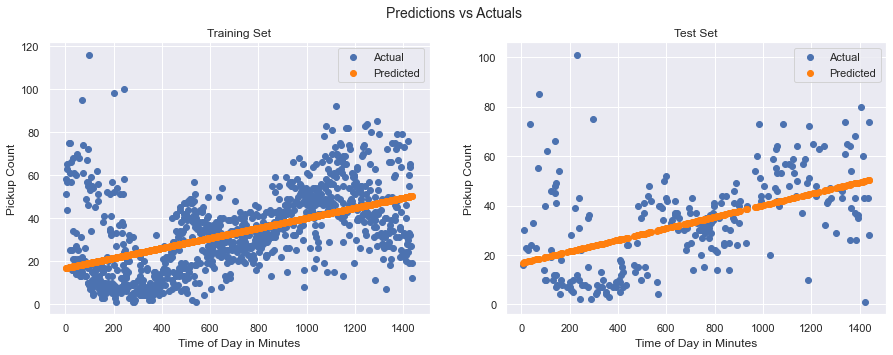

In [5]:
# Your code here
ytrain_pred = OLSModel.predict(X_train)
ytest_pred = OLSModel.predict(X_test)
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (15, 5))
fig.suptitle('Predictions vs Actuals', fontsize=14)
ax1.scatter(x_train, y_train, color='b',label='Actual')
ax1.scatter(x_train, ytrain_pred, color='tab:orange',label ='Predicted')
ax1.set_title('Training Set')
ax1.set_xlabel('Time of Day in Minutes')
ax1.set_ylabel('Pickup Count')
ax1.legend()
ax2.scatter(x_test, y_test, label='Actual', color='b')
ax2.scatter(x_test, ytest_pred, color='tab:orange',label ='Predicted')
ax2.set_title('Test Set')
ax2.set_xlabel('Time of Day in Minutes')
ax2.set_ylabel('Pickup Count')
ax2.legend()



<div class="exercise"> <b> Question 1.4 </b> </div>

Report the $R^2$ score for the fitted model on both the training and test sets.

In [6]:
# Your code here
r2_train = r2_score(y_train, ytrain_pred)
r2_test = r2_score(y_test, ytest_pred)
print('r2_training is', r2_train)
print('r2_test is', r2_test)

r2_training is 0.24302603531893352
r2_test is 0.240661535615741


<div class="exercise"> <b> Question 1.5 </b> </div>

Report the estimates for the slope and intercept for the fitted linear model.  

In [7]:
# Your code here
beta0_sm = OLSModel.params[0]
beta1_sm = OLSModel.params[1]
print(f'The regression coef from statsmodels are: beta_0 = {beta0_sm:8.6f} and beta_1 = {beta1_sm:8.6f}')

The regression coef from statsmodels are: beta_0 = 16.750601 and beta_1 = 0.023335


<div class="exercise"> <b> Question 1.6 </b> </div>

Report the $95\%$ confidence intervals (CIs) for the slope and intercept.  

In [8]:
# Your code here
OLSModel.conf_int(alpha=0.05, cols =None)

,0,1
const,14.675141,18.826062
TimeMin,0.020777,0.025893


<div class="exercise"> <b> Question 1.7 </b> </div>

Discuss the results:

1. How does the test $R^2$ score compare with the best test $R^2$ value obtained with k-NN regression?  Describe why this is not surprising for these data.
2. What does the sign of the slope of the fitted linear model convey about the data?  
3. Interpret the $95\%$ confidence intervals from 3.5.  Based on these CIs is there evidence to suggest that the number of taxi pickups has a significant linear relationship with time of day?  How do you know? 
4. How would $99\%$ confidence intervals for the slope and intercept compare to the $95\%$ confidence intervals (in terms of midpoint and width)?  Briefly explain your answer.  
5. Based on the data structure, what restriction on the model would you put at the endpoints (at $x\approx0$ and $x\approx1440$)?   What does this say about the appropriateness of a linear model?

*your answer here*  
1. The test R^2 score is smaller than the best test R^2 value (at K=75) with k-NN regression. Because these data have two trends, upward and downward, but linear regression has only one trend depending on the slope, thus the resulting model will provide a poor fit to the data than k-NN.
2. The slope of the fitted linear model convey about the ratio between the predictor and the response variable. In other words, we can understand that the slope is the rate of change in the response variable when the predictor increases by 1.
3. The 95% confidence intervals is a range of values that you can be 95% certain contains the slope and intercept of the fitted linear model. We are able to say that the number of taxi as a signigicant linear relationship with time of day. It is easy to know as the 95% confidence interval of the slope is very small.
4. The 99% confidence intervals for slope and intercept are larger in width, and the same with the midpoint compare to the 95% confidence intervals. Because the fitted model has a certain slope and intercept, so the midpoint is unchanged. The 99% confidence intervals have a more extensive range of values, thus larger in width than 95% confidence intervals.
5. At the endpoints 𝑥≈0 and 𝑥≈1440, it should be two values close to the same based on the data structure, but the fitted model calculates two very far different values. A linear model is only appropriate with the data has one clear tendency upward or downward.

<div class="theme"> Question 2 </div>

You may recall from lectures that OLS Linear Regression can be susceptible to outliers in the data.  We're going to look at a dataset that includes some outliers and get a sense for how that affects modeling data with Linear Regression.  **Note, this is an open-ended question, there is not one correct solution (or one correct definition of an outlier).**

<div class="exercise"><b> Question 2.1 </b></div>

We've provided you with two files `outliers_train.csv` and `outliers_test.csv` corresponding to training set and test set data.  What does a visual inspection of training set tell you about the existence of outliers in the data?

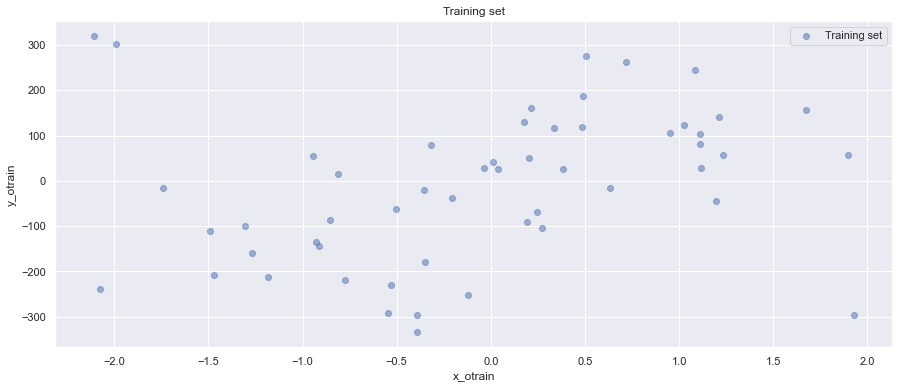

In [9]:
# Your code here
trainingset = pd.read_csv("outliers_train.csv")
x_otrain = trainingset['X']
y_otrain = trainingset['Y']
fig, ax = plt.subplots(1, 1, figsize=(15,6))
ax.scatter(x_otrain, y_otrain, label='Training set', alpha=0.5)
ax.set_title('Training set')
ax.set_xlabel('x_otrain')
ax.set_ylabel('y_otrain')
ax.legend();

*Your answer here*
As very clearly visible in the graph, we can see three points are out of the trend of the training set. Two points are at the left upper corner; one point is at the right lower corner.

<div class="exercise"><b> Question 2.2 </b></div>

Choose `X` as your feature variable and `Y` as your response variable.  Use `statsmodel` to create a Linear Regression model on the training set data.  Store your model in the variable `OutlierOLSModel` and display the model summary.

In [10]:
# Your code here
X_otrain = sm.add_constant(x_otrain)
OutlierOLS = sm.OLS(y_otrain, X_otrain)
OutlierOLSModel = OutlierOLS.fit()
print(OutlierOLSModel.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     4.689
Date:                Fri, 17 Sep 2021   Prob (F-statistic):             0.0351
Time:                        02:27:44   Log-Likelihood:                -343.59
No. Observations:                  53   AIC:                             691.2
Df Residuals:                      51   BIC:                             695.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.5063     22.192     -0.428      0.6

<div class="exercise"><b> Question 2.3 </b></div>

You're given the knowledge ahead of time that there are 3 outliers in the training set data.  The test set data doesn't have any outliers.  You want to remove the 3 outliers in order to get the optimal intercept and slope.  In the case that you're sure of the existence and number (3) of outliers ahead of time, one potential brute force method to outlier detection might be to find the best Linear Regression model on all possible subsets of the training set data with 3 points removed.  Using this method, how many times will you have to calculate the Linear Regression coefficients on the training data?

*Your answer here.*
We have to choose 50 out of 53 points. It means the number of times we will have to calculate the Linear Regression coefficients on the training data are 'Combinations without repetition' C = 53!/((3!)((53-3)!)) = 23426.

<div class="exercise"><b> Question 2.4 </b></div>

In CPSC 4300 we're strong believers that creating heuristic models is a great way to build intuition. In that spirit, construct an approximate algorithm to find the 3 outlier candidates in the training data by taking advantage of the Linear Regression residuals. Place your algorithm in the function `find_outliers_simple`.  It should take the parameters `dataset_x` and `dataset_y`, and `num_outliers` representing your features, response variable values (make sure your response variable is stored as a numpy column vector), and the number of outliers to remove.  The return value should be a list `outlier_indices` representing the indices of the `num_outliers` outliers in the original datasets you passed in.  Run your algorithm and remove the outliers that your algorithm identified, use `statsmodels` to create a Linear Regression model on the remaining training set data, and store your model in the variable `OutlierFreeSimpleModel` display the summary of this model.

In [11]:
def find_outliers_simple(dataset_x, dataset_y, num_outliers):
    
    df = pd.concat([dataset_x, dataset_y], axis=1)
    # get predictions 
    x = sm.add_constant(dataset_x)
    df['y_pred'] = OutlierOLSModel.predict(x)
     
    # get residuals
    df['y_residual'] = abs(df['Y'] - df['y_pred'])
    
    # sort by residual
    df = df.sort_values(by=['y_residual'], ascending=False)
    
    # identify top n residuals as outliers
    outliers = df[0:num_outliers]
    
    return outliers.index.tolist();


find_outliers_simple(x_otrain, y_otrain, 3)
XTrain_out = x_otrain.drop([50, 51, 52])
YTrain_out = y_otrain.drop([50, 51, 52])

In [12]:
# Your code here
OutlierFreeSimpleModel = sm.OLS(YTrain_out, XTrain_out)
OutlierFreeSimpleModel = OutlierFreeSimpleModel.fit()
  
# printing the summary table
print(OutlierFreeSimpleModel.summary())

                                 OLS Regression Results                                
Dep. Variable:                      Y   R-squared (uncentered):                   0.400
Model:                            OLS   Adj. R-squared (uncentered):              0.388
Method:                 Least Squares   F-statistic:                              32.73
Date:                Fri, 17 Sep 2021   Prob (F-statistic):                    6.28e-07
Time:                        02:27:55   Log-Likelihood:                         -309.76
No. Observations:                  50   AIC:                                      621.5
Df Residuals:                      49   BIC:                                      623.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [13]:
# Your code here
X_otrain = sm.add_constant(x_otrain)
OutlierOLS = sm.OLS(y_otrain, X_otrain)
OutlierOLSModel = OutlierOLS.fit()
OutlierFreeSimpleModel = sm.OLS(YTrain_out, XTrain_out)
OutlierFreeSimpleModel = OutlierFreeSimpleModel.fit()
y_otrainpred = OutlierOLSModel.predict(X_otrain)
y_oftrainpred = OutlierFreeSimpleModel.predict(XTrain_out)

<div class="exercise"><b> Question 2.5 </b></div>

Create a figure with two subplots. The first is a scatterplot where the color of the points denotes the outliers from the non-outliers in the training set, and include two regression lines on this scatterplot: one fitted with the outliers included and one fitted with the outlier removed (all on the training set).  The second plot should include a scatterplot of points from the test set with the same two regression lines fitted on the training set: with and without outliers.  Visually which model fits the test set data more closely?

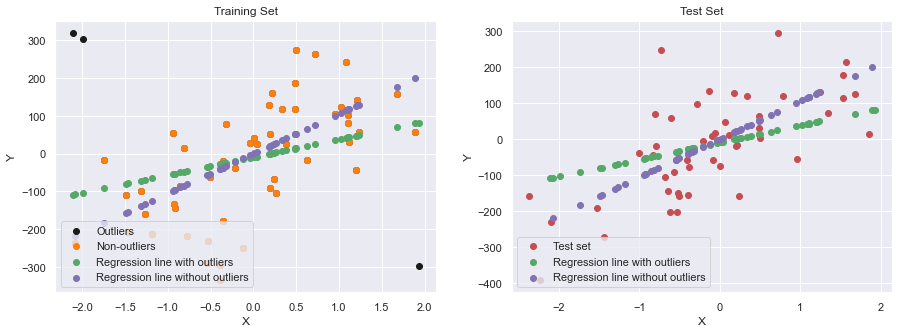

In [14]:
# Your code here
testset = pd.read_csv("outliers_test.csv")
x_otest = testset['X']
y_otest = testset['Y']
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (15, 5))
ax1.scatter(x_otrain, y_otrain, color='k',label='Outliers')
ax1.scatter(XTrain_out, YTrain_out, color='tab:orange',label ='Non-outliers')
ax1.scatter(x_otrain, y_otrainpred, color='g',label='Regression line with outliers')
ax1.scatter(XTrain_out, y_oftrainpred, color='m',label='Regression line without outliers')
ax1.set_title('Training Set')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.legend(loc=3)
ax2.scatter(x_otest, y_otest, label='Test set', color='r')
ax2.scatter(x_otrain, y_otrainpred, color='g',label='Regression line with outliers')
ax2.scatter(XTrain_out, y_oftrainpred, color='m',label='Regression line without outliers')
ax2.set_title('Test Set')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.legend(loc=3)

*Your answer here*
It can be seen that the model without outliers fits more closely than the model with outliers.

<div class="exercise"><b> Question 2.6 </b></div>

Calculate the $R^2$ score for the `OutlierOLSModel` and the `OutlierFreeSimpleModel` on the test set data.  Which model produces a better $R^2$ score?

In [15]:
# Your code here
X_otest = sm.add_constant(x_otest)
y_otestpred = OutlierOLSModel.predict(X_otest)
y_oftestpred = OutlierFreeSimpleModel.predict(x_otest)
r2_outliers = r2_score(y_otest, y_otestpred)
r2_woutliers = r2_score(y_otest, y_oftestpred)
print('r2_outliers is', r2_outliers)
print('r2_outlierfree is', r2_woutliers)
print('The model without outliers produces a better R^2 score')

r2_outliers is 0.34085656043405654
r2_outlierfree is 0.4579491642913984
The model without outliers produces a better R^2 score


<div class="exercise"><b> Question 2.7 </b></div>

One potential problem with the brute force outlier detection approach in 4.3 and the heuristic algorithm you constructed 4.4 is that they assume prior knowledge of the number of outliers.  In general you can't expect to know ahead of time the number of outliers in your dataset.  Propose how you would alter and/or use the algorithm you constructed in 4.4 to create a more general heuristic (i.e. one which doesn't presuppose the number of outliers) for finding outliers in your dataset.  

**Hints**:
   1. Should outliers be removed one at a time or in batches?
   2. What metric would you use and how would you use it to determine how many outliers to consider removing?

We should remove outliers one at a time. Please take a look at question 2.6; we can see the model without outliers produces a better R^2 score as an idea to determine the number of outliers to consider removing.
1. At first, we have to fit the original model (with outliers) and calculate the R^2 score.
2. Develop the heuristic algorithm (question 2.4) and run with parameter 'num_outliers'. Start with num_outliers = 1 and then increase gradually; for each certain num_outliers we calculate the new R^2 score respectively.
3. We will stop when num_outliers = n provides the new R^2 score is greater than R^2 score of the original model with outliers and num_outliers = n + 1 provides the new R^2 score is less than R^2 score of the original model with outliers. It means n is the number of outliers.
4. At that time, we export the number of outliers through parameter num_outliers.